In [7]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

In [8]:
# Get list of DICOM files
dataset_path = Path('Dataset')
dicom_files = list(dataset_path.glob('*.dicom'))
print(f"Found {len(dicom_files)} DICOM files")
print("Files:", [f.name for f in dicom_files])

Found 3 DICOM files
Files: ['00a4089038fb4f7b926624bd31b3ca88.dicom', '00a90a72fe7d73ba4793935f7c3c3ce9.dicom', '00aac5dcd9a01d49cdab7420f47a343d.dicom']


In [9]:
# Load and display a single DICOM file
dicom_file = str(dicom_files[0])
ds = pydicom.dcmread(dicom_file)

# Display DICOM metadata
print("DICOM Metadata:")
print(f"Patient ID: {ds.PatientID if 'PatientID' in ds else 'N/A'}")
print(f"Study Date: {ds.StudyDate if 'StudyDate' in ds else 'N/A'}")
print(f"Modality: {ds.Modality if 'Modality' in ds else 'N/A'}")
print(f"Image Size: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing: {ds.PixelSpacing if 'PixelSpacing' in ds else 'N/A'}")

DICOM Metadata:
Patient ID: N/A
Study Date: N/A
Modality: N/A
Image Size: 1485 x 1172
Pixel Spacing: [0.14300, 0.14300]


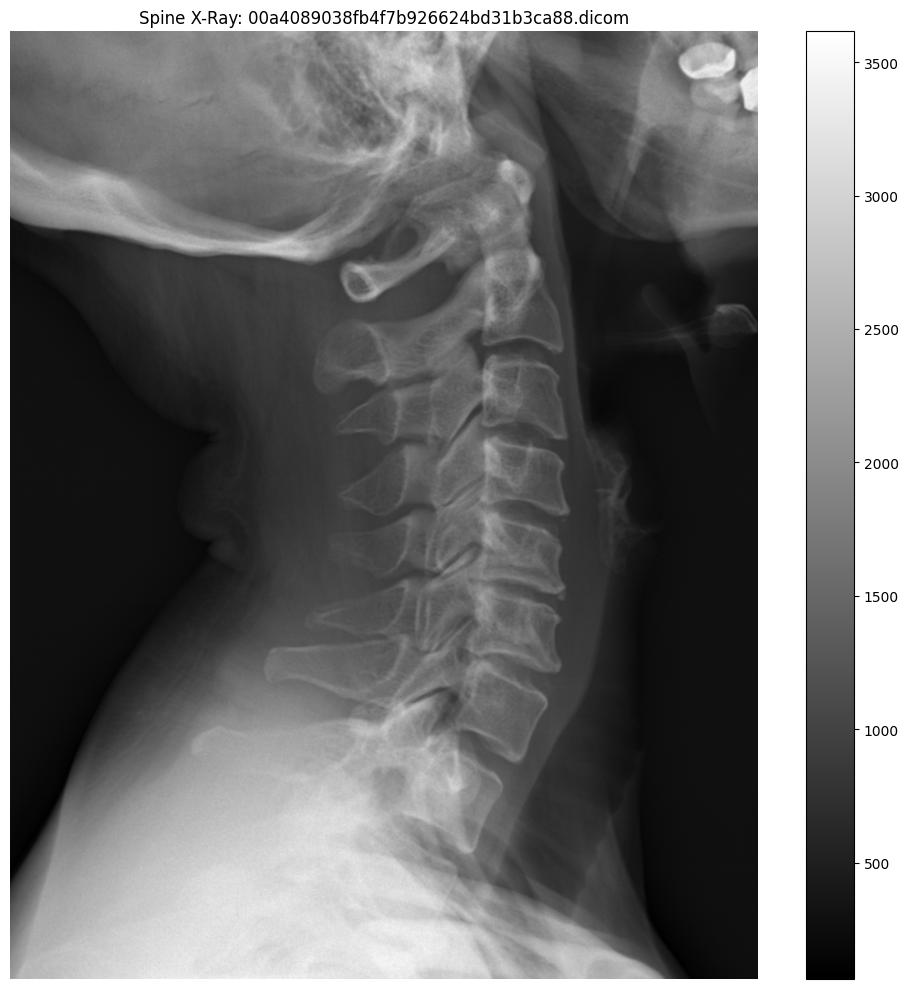

In [10]:
# Plot single DICOM image
plt.figure(figsize=(10, 10))
plt.imshow(ds.pixel_array, cmap='gray')
plt.title(f'Spine X-Ray: {dicom_files[0].name}')
plt.axis('off')
plt.colorbar()
plt.tight_layout()
plt.show()

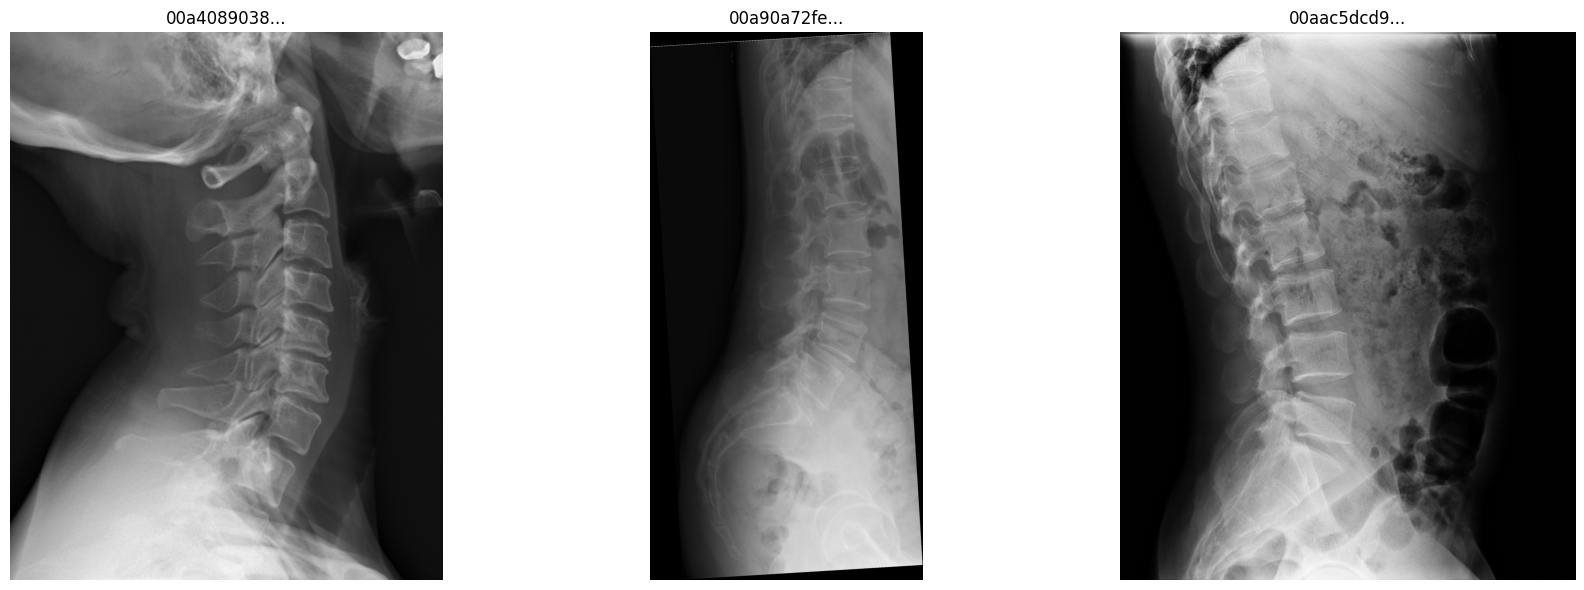

In [11]:
# Plot all DICOM images in a grid
fig, axes = plt.subplots(1, len(dicom_files), figsize=(18, 6))

if len(dicom_files) == 1:
    axes = [axes]

for idx, dicom_file in enumerate(dicom_files):
    ds = pydicom.dcmread(str(dicom_file))
    axes[idx].imshow(ds.pixel_array, cmap='gray')
    axes[idx].set_title(f'{dicom_file.name[:10]}...')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

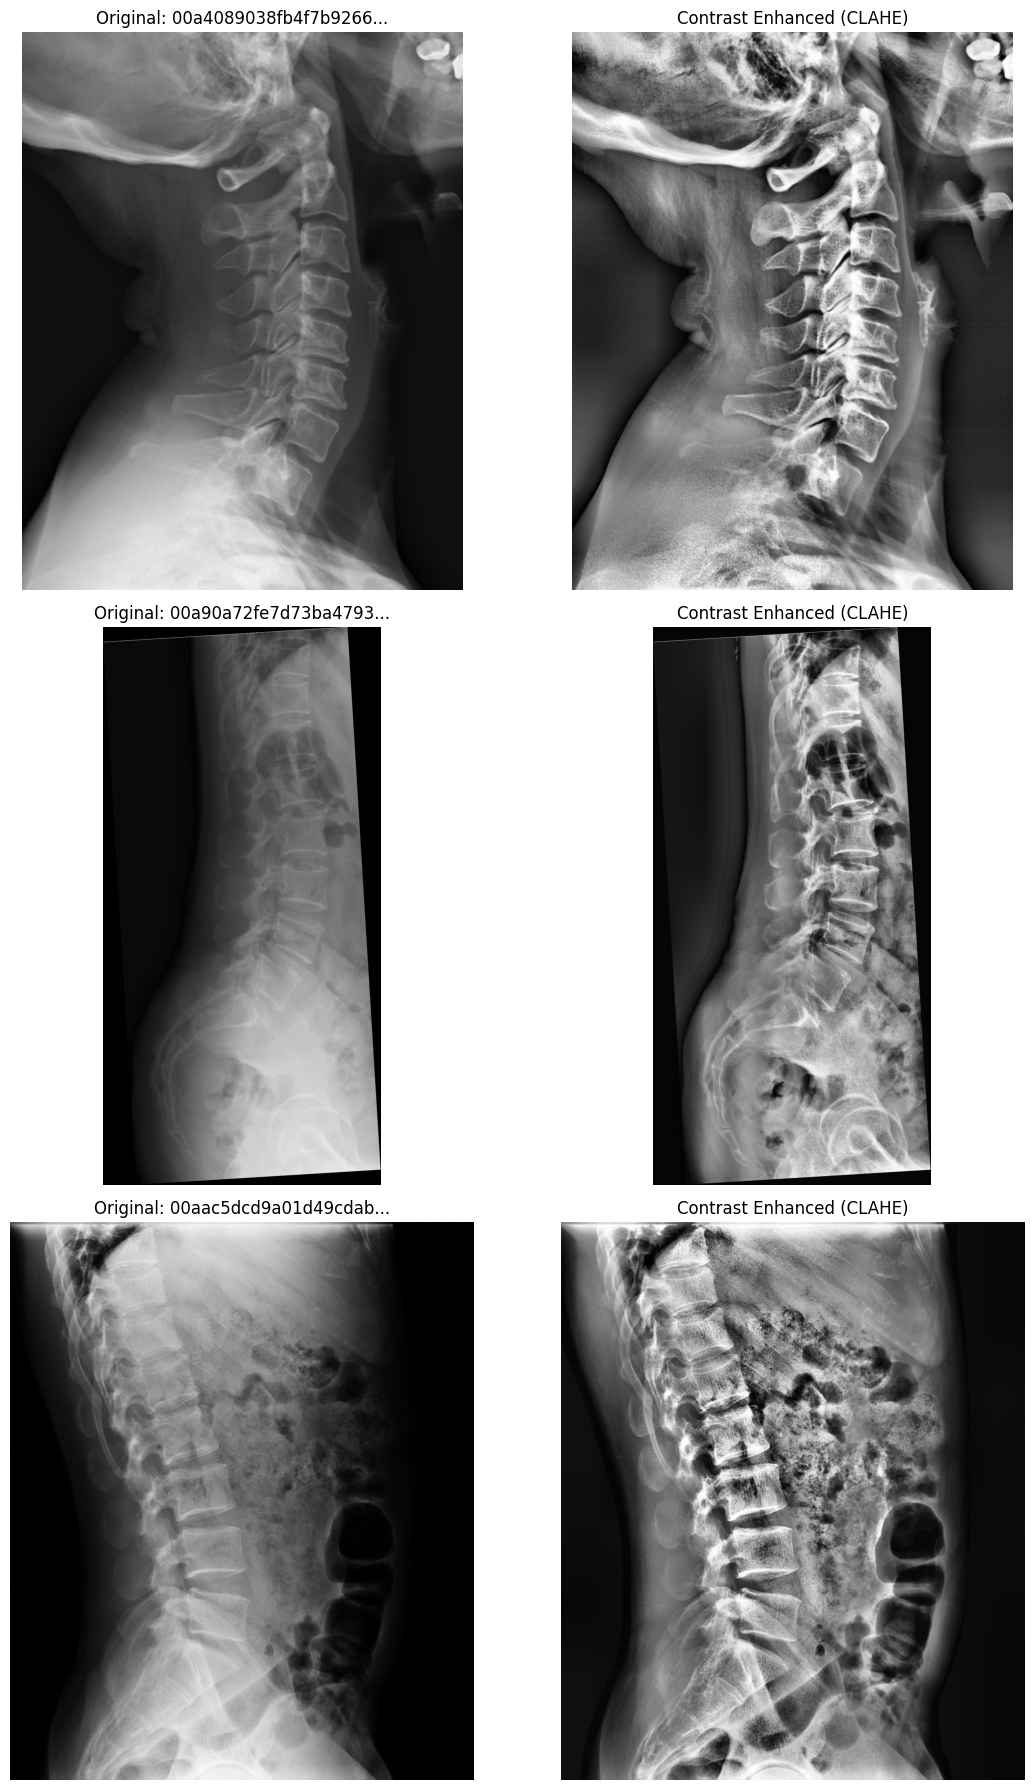

In [12]:
# Enhanced visualization with histogram equalization
from skimage import exposure

fig, axes = plt.subplots(len(dicom_files), 2, figsize=(12, 6 * len(dicom_files)))

if len(dicom_files) == 1:
    axes = axes.reshape(1, -1)

for idx, dicom_file in enumerate(dicom_files):
    ds = pydicom.dcmread(str(dicom_file))
    img = ds.pixel_array
    
    # Original image
    axes[idx, 0].imshow(img, cmap='gray')
    axes[idx, 0].set_title(f'Original: {dicom_file.name[:20]}...')
    axes[idx, 0].axis('off')
    
    # Contrast-enhanced image
    img_eq = exposure.equalize_adapthist(img, clip_limit=0.03)
    axes[idx, 1].imshow(img_eq, cmap='gray')
    axes[idx, 1].set_title('Contrast Enhanced (CLAHE)')
    axes[idx, 1].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Convert DICOM files to PNG
from PIL import Image

# Create output directory for PNG files
output_dir = Path('Dataset/png_output')
output_dir.mkdir(exist_ok=True)

print(f"Converting {len(dicom_files)} DICOM files to PNG...")

for dicom_file in dicom_files:
    # Read DICOM file
    ds = pydicom.dcmread(str(dicom_file))
    
    # Get pixel array and normalize to 0-255
    img_array = ds.pixel_array
    img_normalized = ((img_array - img_array.min()) / (img_array.max() - img_array.min()) * 255).astype(np.uint8)
    
    # Create PIL Image and save as PNG
    img = Image.fromarray(img_normalized)
    output_path = output_dir / f"{dicom_file.stem}.png"
    img.save(output_path)
    
    print(f"✓ Converted: {dicom_file.name} -> {output_path.name}")

print(f"\nAll files converted successfully!")
print(f"PNG files saved in: {output_dir.absolute()}")

Converting 3 DICOM files to PNG...
✓ Converted: 00a4089038fb4f7b926624bd31b3ca88.dicom -> 00a4089038fb4f7b926624bd31b3ca88.png
✓ Converted: 00a4089038fb4f7b926624bd31b3ca88.dicom -> 00a4089038fb4f7b926624bd31b3ca88.png
✓ Converted: 00a90a72fe7d73ba4793935f7c3c3ce9.dicom -> 00a90a72fe7d73ba4793935f7c3c3ce9.png
✓ Converted: 00a90a72fe7d73ba4793935f7c3c3ce9.dicom -> 00a90a72fe7d73ba4793935f7c3c3ce9.png
✓ Converted: 00aac5dcd9a01d49cdab7420f47a343d.dicom -> 00aac5dcd9a01d49cdab7420f47a343d.png

All files converted successfully!
PNG files saved in: d:\Languages\ML-DL\Spine\Dataset\png_output
✓ Converted: 00aac5dcd9a01d49cdab7420f47a343d.dicom -> 00aac5dcd9a01d49cdab7420f47a343d.png

All files converted successfully!
PNG files saved in: d:\Languages\ML-DL\Spine\Dataset\png_output


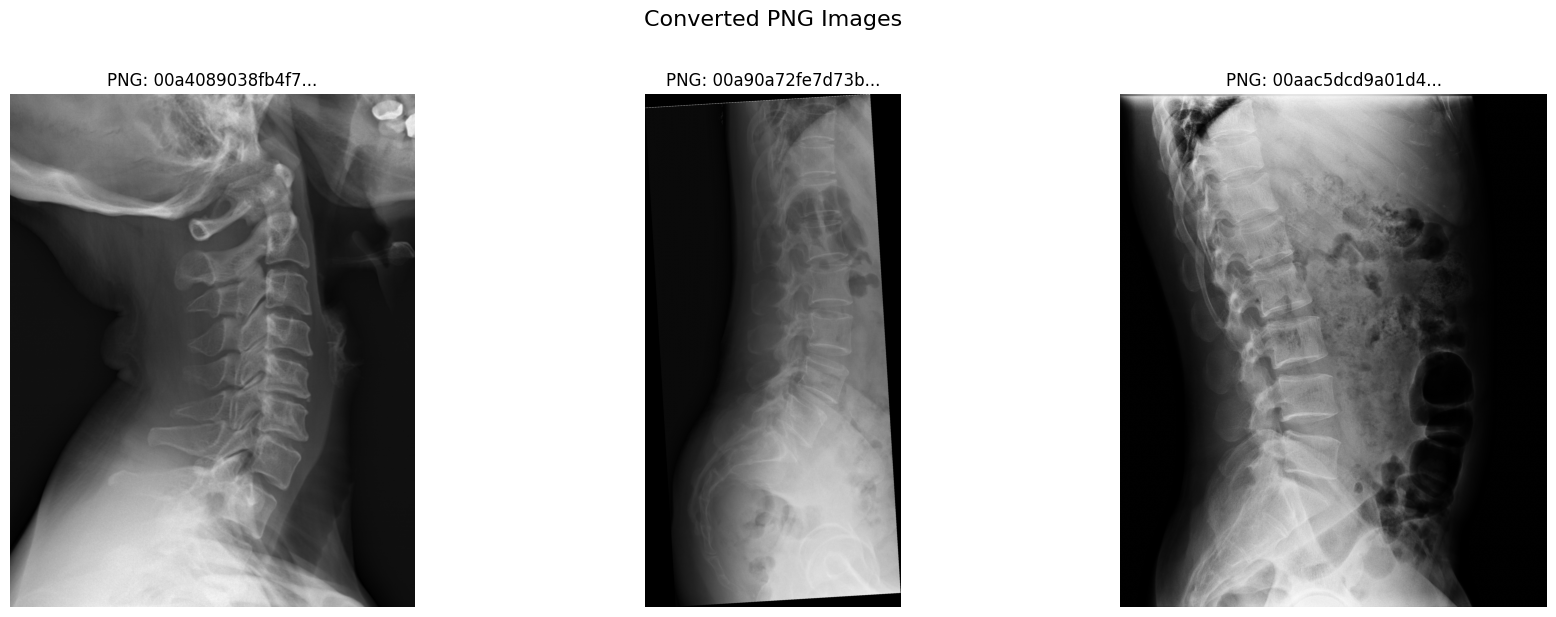

In [14]:
# Verify PNG conversion - display converted images
png_files = list(output_dir.glob('*.png'))

fig, axes = plt.subplots(1, len(png_files), figsize=(18, 6))

if len(png_files) == 1:
    axes = [axes]

for idx, png_file in enumerate(png_files):
    img = plt.imread(png_file)
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(f'PNG: {png_file.name[:15]}...')
    axes[idx].axis('off')

plt.suptitle('Converted PNG Images', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()